###  <u> ***EDA Features Importance for severity and frequency***  </u>

In [ ]:
%run 3_EDA.ipynb

In [2]:
df2=df.copy()

In [3]:
X_1 = df2.copy()
y_1= X_1.pop("severity")
# Label encoding for categoricals
for colname in X_1.select_dtypes("object"):
    X_1[colname], _ = X_1[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features_1 = X_1.dtypes == int

In [4]:
X_2 = df2.copy()
y_2= X_2.pop("frequincy")
# Label encoding for categoricals
for colname in X_2.select_dtypes("object"):
    X_2[colname], _ = X_2[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features_2 = X_2.dtypes == int

In [5]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [6]:
mi_scores_1 = make_mi_scores(X_1, y_1, discrete_features_1)
mi_scores_2 = make_mi_scores(X_2, y_2, discrete_features_2)

In [7]:
print(mi_scores_1)  # show a few features with their MI scores

claimcst0    0.610368
numclaims    0.253794
clm          0.251548
frequincy    0.247525
exposure     0.015484
area         0.001611
veh_value    0.001595
veh_age      0.000021
veh_body     0.000000
gender       0.000000
agecat       0.000000
Name: MI Scores, dtype: float64


In [8]:
print(mi_scores_2)  # show a few features with their MI scores

exposure     0.348985
numclaims    0.252742
claimcst0    0.246956
clm          0.246038
severity     0.244709
area         0.005033
veh_body     0.002707
agecat       0.002303
veh_value    0.002230
gender       0.001960
veh_age      0.000000
Name: MI Scores, dtype: float64


In [9]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)

Text(0.5, 1.0, 'frequency Mutual Information Scores')

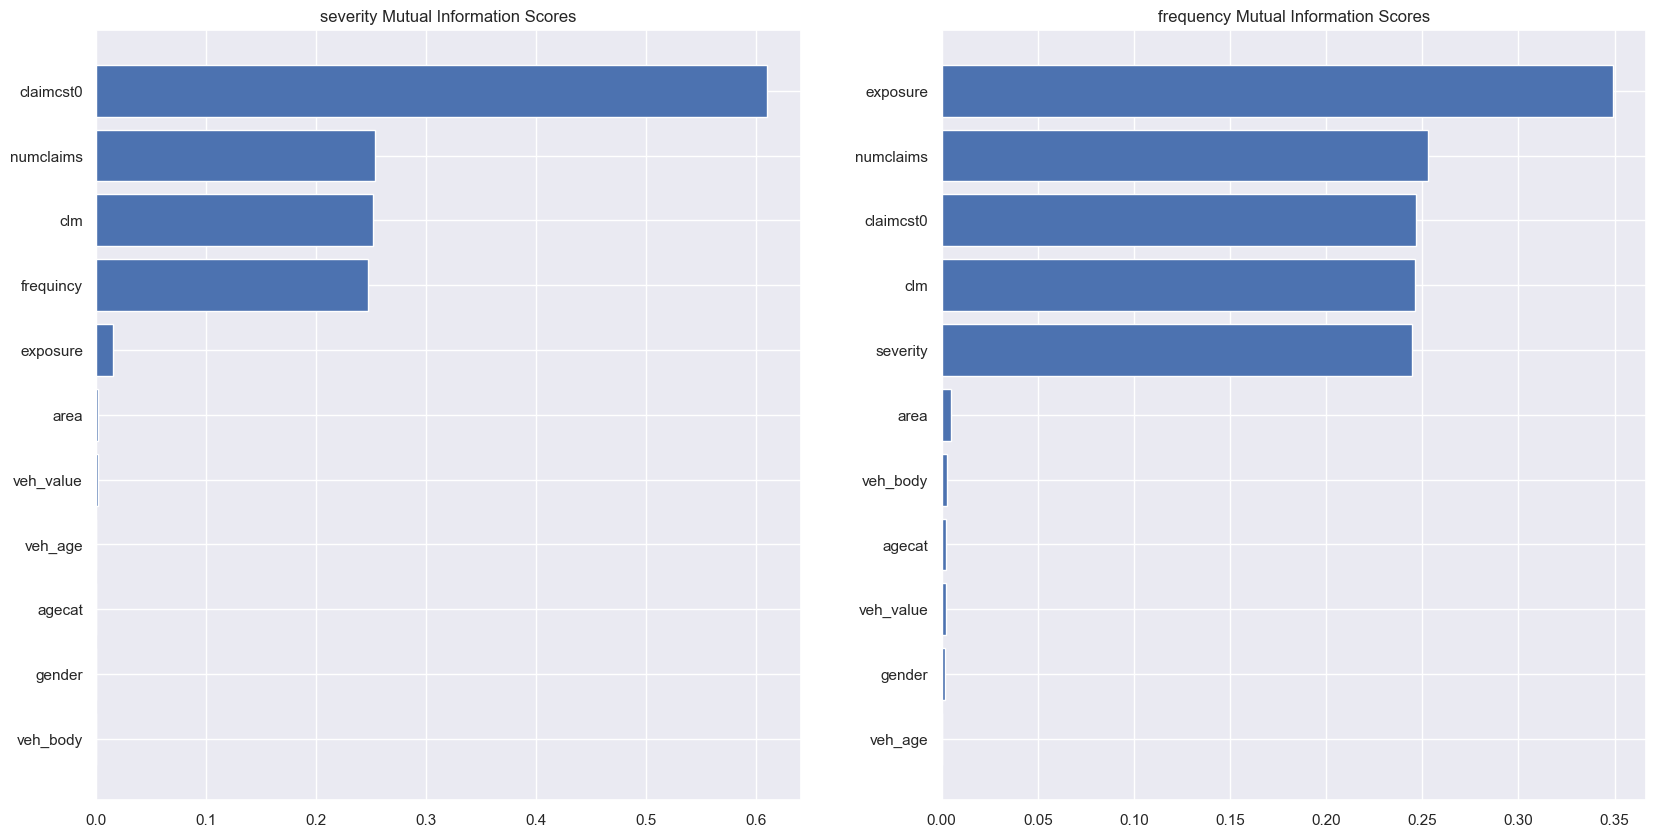

In [10]:
plt.subplot(121)
plot_mi_scores(mi_scores_1)
plt.title("severity Mutual Information Scores")
plt.subplot(122)
plot_mi_scores(mi_scores_2)
plt.title("frequency Mutual Information Scores")

In [11]:
df2.head()

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,severity,frequincy
0,1.06,0.303901,0,0,0.0,HBACK,3,F,C,2,0.0,0.0
1,1.03,0.648871,0,0,0.0,HBACK,2,F,A,4,0.0,0.0
2,3.26,0.569473,0,0,0.0,UTE,2,F,E,2,0.0,0.0
3,4.14,0.317591,0,0,0.0,STNWG,2,F,D,2,0.0,0.0
4,0.72,0.648871,0,0,0.0,HBACK,4,F,C,2,0.0,0.0


In [16]:

from boruta import BorutaPy

In [17]:
from xgboost import XGBRegressor
model_XGBRegressor = XGBRegressor(n_estimators=1000,
                                            learning_rate=0.1,
                                            n_jobs=4)

In [19]:
boruta_FeatuteSelection=BorutaPy(model_XGBRegressor,n_estimators="auto",verbose=2,random_state=1)

In [20]:
boruta_FeatuteSelection.fit(X_1.to_numpy(),y_1.to_numpy())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	5
Iteration:

BorutaPy(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None, gpu_id=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=0.1,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=None, max_leaves=None,
                                min_child_weight=None, missing=nan,
                                monotone_constraints=None, n_estimators=34,
                                n_jobs=4, num_parallel_tree=None,
                                predictor=None, random_state=758582875, ...),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x21E2146B540, verbose=2)

In [21]:
print("boruta_FeatuteSelection.n_features :",boruta_FeatuteSelection.n_features_)
print("boruta_FeatuteSelection.ranking :", boruta_FeatuteSelection.ranking_)
print("boruta_FeatuteSelection.support :",boruta_FeatuteSelection.support_ )

boruta_FeatuteSelection.n_features : 5
boruta_FeatuteSelection.ranking : [1 1 1 1 1 2 4 3 7 6 5]
boruta_FeatuteSelection.support : [ True  True  True  True  True False False False False False False]


In [22]:
pd.DataFrame({"feature_name":list(X_1.columns),
              "Ranking":boruta_FeatuteSelection.ranking_,
              "boruta_FeatuteSelection.support":boruta_FeatuteSelection.support_}).sort_values(by="Ranking")

,feature_name,Ranking,boruta_FeatuteSelection.support
0,veh_value,1,True
1,exposure,1,True
2,clm,1,True
3,numclaims,1,True
4,claimcst0,1,True
5,veh_body,2,False
7,gender,3,False
6,veh_age,4,False
10,frequincy,5,False
9,agecat,6,False


In [23]:
boruta_FeatuteSelection=BorutaPy(model_XGBRegressor,n_estimators="auto",verbose=2,random_state=1)

In [24]:
boruta_FeatuteSelection.fit(X_2.to_numpy(),y_2.to_numpy())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	4
Iteration:

BorutaPy(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None, gpu_id=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=0.1,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=None, max_leaves=None,
                                min_child_weight=None, missing=nan,
                                monotone_constraints=None, n_estimators=34,
                                n_jobs=4, num_parallel_tree=None,
                                predictor=None, random_state=391207081, ...),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x21E26F6EA40, verbose=2)

In [25]:
print("boruta_FeatuteSelection.n_features :",boruta_FeatuteSelection.n_features_)
print("boruta_FeatuteSelection.ranking :", boruta_FeatuteSelection.ranking_)
print("boruta_FeatuteSelection.support :",boruta_FeatuteSelection.support_ )

boruta_FeatuteSelection.n_features : 5
boruta_FeatuteSelection.ranking : [1 1 1 1 3 5 2 5 5 5 1]
boruta_FeatuteSelection.support : [ True  True  True  True False False False False False False  True]


In [26]:
pd.DataFrame({"feature_name":list(X_2.columns),
              "Ranking":boruta_FeatuteSelection.ranking_,
              "boruta_FeatuteSelection.support":boruta_FeatuteSelection.support_}).sort_values(by="Ranking")

,feature_name,Ranking,boruta_FeatuteSelection.support
0,veh_value,1,True
1,exposure,1,True
2,clm,1,True
3,numclaims,1,True
10,severity,1,True
6,veh_age,2,False
4,claimcst0,3,False
5,veh_body,5,False
7,gender,5,False
8,area,5,False


---